In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline  
#for putting the visualization within notebook

In [19]:
dataframe = pd.read_csv('programmers(csv).csv')
dataframe.head()


,All_Devs,Python,Place,JavaScript,Age
0,17784,20046,Delhi,16446,18
1,16500,17100,Delhi,16791,19
2,18012,20000,Delhi,18942,20
3,20628,24744,mumbai,21780,21
4,25206,30500,pune,25704,22


In [48]:
x = dataframe[['All_Devs','Python','Place', 'JavaScript']] #feature matrix
y = dataframe['Age']    #response matrix
x.head()

#x = dataframe.iloc[:,:-1].values
#y = dataframe.iloc[:,4].values

#these creates an 2d array using values attribute


,All_Devs,Python,Place,JavaScript
0,17784,20046,Delhi,16446
1,16500,17100,Delhi,16791
2,18012,20000,Delhi,18942
3,20628,24744,mumbai,21780
4,25206,30500,pune,25704


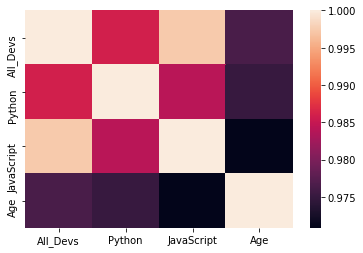

In [23]:
sns.heatmap(dataframe.corr())

In [82]:
#encoding the categorical data and whwnever you are using encoding use loc[] or iloc[]
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#labelenc = LabelEncoder()
#x['Place'] = labelenc.fit_transform(x[['Place']])

hotenc = OneHotEncoder(sparse = False)
dataframe['Place'] = hotenc.fit_transform(dataframe[['Place']])
dataframe



,All_Devs,Python,Place,JavaScript,Age
0,17784,20046,1.0,16446,18
1,16500,17100,1.0,16791,19
2,18012,20000,1.0,18942,20
3,20628,24744,0.0,21780,21
4,25206,30500,0.0,25704,22
5,30252,37732,0.0,29000,23
6,34368,41247,0.0,34372,24
7,38496,45372,0.0,37810,25
8,42000,48876,1.0,43515,26
9,46752,53850,1.0,46823,27


### Step2 - splitting our dataset for training/testing purposes

In [62]:
#now since our dataset looks perfect and numerical we now create our multiple lin. reg model using train/split
from sklearn.model_selection import train_test_split

#we splitted our dataset into 2 regions with 4 parts for training and testing purposes
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)



### Step3 - setting up linear regression model

In [74]:
#fitting mult. lin. reg. to training set
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)
#this creates a an approximate least sq. line passing thru our training points


#print(linreg.intercept_)   #prints intercept b0
#print(linreg.coef_)        #gives slope values b1,b2,b3,b4
#print(zip(['All_Devs','Python','Place', 'JavaScript'],linreg.coef_)) #zips slope val. with its col. val 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
"""
our eq. is of the form : y = b0 + b1.(All_Devs) + b2.(Python) + b3.(Place) + b4(JavaScript)
    
                    b0 - intercept
                    b1,b2,b3,b4 - slopes
            
        for graph b/w  1) (All_Devs vs Age)-> slope = b1
                       2) (Python vs Age)-> slope = b2
                       3) (Place vs Age)-> slope = b3
                       4) (JavaScript vs Age)-> slope = b4
                       
"""                       

'\nour eq. is of the form : y = b0 + b1.(All_Devs) + b2.(Python) + b3.(Place) + b4(JavaScript)\n    \n                    b0 - intercept\n                    b1,b2,b3,b4 - slopes\n            \n        for graph b/w  1) (All_Devs vs Age)-> slope = b1\n                       2) (Python vs Age)-> slope = b2\n                       3) (Place vs Age)-> slope = b3\n                       4) (JavaScript vs Age)-> slope = b4\n                       \n'

### Step4 - testing the model and predicting using testing set

In [65]:
#storing the predicted val in y_pred and then we would compare y_pred with y_test or actual y
y_pred = linreg.predict(x_test)

print(y_pred)

[37.86960637 34.02321697 34.7421079  32.82356216 37.86960637 37.86960637
 32.82356216 32.82356216 34.7421079  34.7421079  41.43407939 35.94176271]


### Step5 - Evaluation of our model- How good our model is?

In [76]:
#1. using root mean square

from sklearn import metrics
import numpy as np

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

8.990272316134702


In [84]:
#2. using r2 or r square method

from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred)*100,'%')


1.2321837251429435 %
